In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Creating Labels

In [2]:
directory = "PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Poliwag', 'Voltorb', 'Rhydon', 'Kingler', 'Poliwrath', 'Jynx', 'Weedle', 'Cloyster', 'Exeggutor', 'Fearow', 'Alakazam', 'Dragonite', 'Oddish', 'Pidgeot', 'Shellder', 'Victreebel', 'Gengar', 'Gloom', 'Bulbasaur', 'Machoke', 'Dratini', 'Psyduck', 'Parasect', 'Metapod', 'Geodude', 'Clefable', 'Horsea', 'Nidorino', 'Dewgong', 'Paras', 'Clefairy', 'Tentacool', 'Arcanine', 'Magikarp', 'Ditto', 'Lickitung', 'Kangaskhan', 'Flareon', 'Squirtle', 'Golbat', 'Electrode', 'Machop', 'Alolan Sandslash', 'MrMime', 'Goldeen', 'Charizard', 'Rattata', 'Exeggcute', 'Moltres', 'Dugtrio', 'Jolteon', 'Dodrio', 'Nidoqueen', 'Jigglypuff', 'Spearow', 'Omanyte', 'Zubat', 'Lapras', 'Beedrill', 'Graveler', 'Magmar', 'Persian', 'Weezing', 'Charmander', 'Magnemite', 'Dragonair', 'Ninetales', 'Hypno', 'Nidorina', 'Mankey', 'Starmie', 'Blastoise', 'Slowbro', 'Kakuna', 'Bellsprout', 'Koffing', 'Cubone', 'Raticate', 'Snorlax', 'Primeape', 'Pidgeotto', 'Mewtwo', 'Venonat', 'Wigglytuff', 'Kadabra', 'Machamp', 'Porygon',

In [3]:
print(nb)

150


In [4]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2024-06-07 18:11:21.377161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 18:11:23.310220: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/regy/miniconda3/envs/tf/lib/
2024-06-07 18:11:23.310429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/regy/miniconda3/envs/tf/lib/
2024-06-07 18:11:23.310441: W tensorflow/compiler/tf2tenso

# Converting images to Numpy arrays

* Changed their dimensions to 150 x 150
* Normalized the pixel values

In [5]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [6]:
X, y = input_target_split(directory,labels)

Completed: Wartortlendslash

In [7]:
len(stored)

150

# Visualizing the images and their True labels

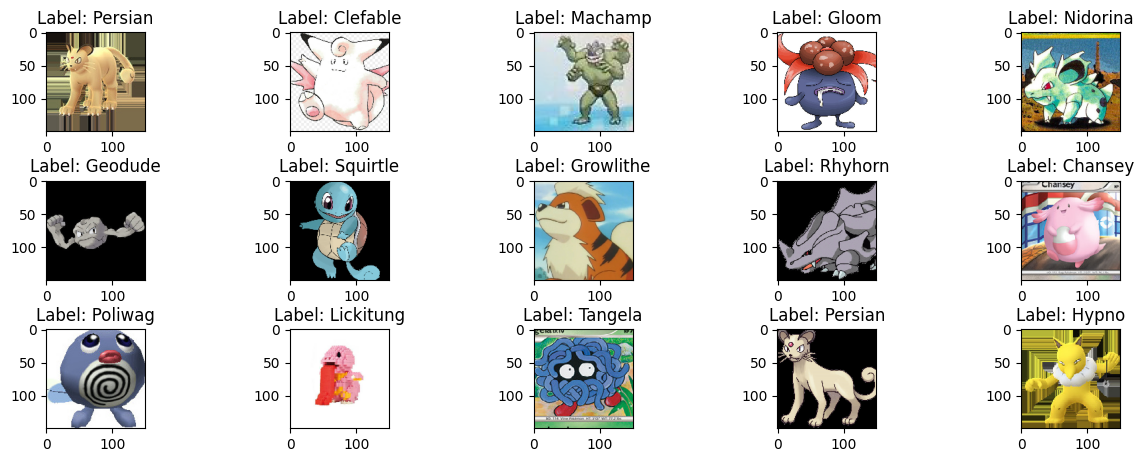

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [9]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

# Train Test Split and encoding of labels

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([36, 45, 39, 36, 26, 36, 36, 39, 40, 38, 20, 41, 37, 28, 39, 41, 39,
       36, 35, 31, 21, 29, 35, 42, 27, 30, 39, 36, 34, 35, 35, 38, 28, 32,
       28, 37

In [11]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [12]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

# Freezing the MobileNetV2 up to layer 100

In [13]:
from tensorflow.keras.applications import MobileNetV2

img_size = 150
base_model = MobileNetV2(include_top=False,
                         weights='imagenet',
                         input_shape=(img_size, img_size, 3))

for layer in base_model.layers[:100]:
    layer.trainable = False

for layer in base_model.layers[100:]:
    layer.trainable = True


2024-06-07 18:11:59.729660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-07 18:11:59.817320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-07 18:11:59.817416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-07 18:11:59.819106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

# Feedforward network for classifying 150 pokemon

In [14]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Early stopping conditions in case model accuracy does not improve 

In [15]:
filepath= "model_pokemon"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [16]:
train_steps_per_epoch = np.ceil(len(X_train) / 32)
val_steps_per_epoch = np.ceil(len(X_test) / 32)

hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        steps_per_epoch=train_steps_per_epoch,
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        validation_steps=val_steps_per_epoch,
                                        epochs=25,
                                        callbacks=callbacks_list
                                        )

Epoch 1/25


2024-06-07 18:12:12.986695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-06-07 18:12:18.829109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-06-07 18:12:18.862868: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x34693af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-07 18:12:18.862930: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-07 18:12:18.907058: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-07 18:12:19.218248: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifet

167/167 [==============================] - ETA: 0s - loss: 2.9463 - accuracy: 0.3536
Epoch 1: val_accuracy improved from -inf to 0.07124, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 59s 244ms/step - loss: 2.9463 - accuracy: 0.3536 - val_loss: 12.7480 - val_accuracy: 0.0712 - lr: 0.0010
Epoch 2/25
167/167 [==============================] - ETA: 0s - loss: 1.1530 - accuracy: 0.6799
Epoch 2: val_accuracy improved from 0.07124 to 0.14181, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 35s 207ms/step - loss: 1.1530 - accuracy: 0.6799 - val_loss: 8.2517 - val_accuracy: 0.1418 - lr: 0.0010
Epoch 3/25
167/167 [==============================] - ETA: 0s - loss: 0.7592 - accuracy: 0.7864
Epoch 3: val_accuracy did not improve from 0.14181
167/167 [==============================] - 19s 111ms/step - loss: 0.7592 - accuracy: 0.7864 - val_loss: 12.4324 - val_accuracy: 0.0885 - lr: 0.0010
Epoch 4/25
167/167 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8307
Epoch 4: val_accuracy improved from 0.14181 to 0.19441, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 36s 216ms/step - loss: 0.5922 - accuracy: 0.8307 - val_loss: 8.7491 - val_accuracy: 0.1944 - lr: 0.0010
Epoch 5/25
167/167 [==============================] - ETA: 0s - loss: 0.4786 - accuracy: 0.8582
Epoch 5: val_accuracy did not improve from 0.19441

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
167/167 [==============================] - 19s 114ms/step - loss: 0.4786 - accuracy: 0.8582 - val_loss: 12.3612 - val_accuracy: 0.1791 - lr: 0.0010
Epoch 6/25
167/167 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.9280
Epoch 6: val_accuracy improved from 0.19441 to 0.32091, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 197ms/step - loss: 0.2386 - accuracy: 0.9280 - val_loss: 6.6072 - val_accuracy: 0.3209 - lr: 2.0000e-04
Epoch 7/25
167/167 [==============================] - ETA: 0s - loss: 0.1488 - accuracy: 0.9596
Epoch 7: val_accuracy improved from 0.32091 to 0.45606, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 198ms/step - loss: 0.1488 - accuracy: 0.9596 - val_loss: 4.0398 - val_accuracy: 0.4561 - lr: 2.0000e-04
Epoch 8/25
167/167 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9679
Epoch 8: val_accuracy improved from 0.45606 to 0.59254, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 198ms/step - loss: 0.1143 - accuracy: 0.9679 - val_loss: 2.2773 - val_accuracy: 0.5925 - lr: 2.0000e-04
Epoch 9/25
167/167 [==============================] - ETA: 0s - loss: 0.1073 - accuracy: 0.9671
Epoch 9: val_accuracy improved from 0.59254 to 0.64980, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 35s 209ms/step - loss: 0.1073 - accuracy: 0.9671 - val_loss: 1.7438 - val_accuracy: 0.6498 - lr: 2.0000e-04
Epoch 10/25
167/167 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9699
Epoch 10: val_accuracy improved from 0.64980 to 0.73169, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 34s 204ms/step - loss: 0.0963 - accuracy: 0.9699 - val_loss: 1.2485 - val_accuracy: 0.7317 - lr: 2.0000e-04
Epoch 11/25
167/167 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9778
Epoch 11: val_accuracy improved from 0.73169 to 0.80027, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 34s 199ms/step - loss: 0.0773 - accuracy: 0.9778 - val_loss: 0.9238 - val_accuracy: 0.8003 - lr: 2.0000e-04
Epoch 12/25
167/167 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9763
Epoch 12: val_accuracy improved from 0.80027 to 0.81225, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 194ms/step - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.8428 - val_accuracy: 0.8123 - lr: 2.0000e-04
Epoch 13/25
167/167 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9801
Epoch 13: val_accuracy improved from 0.81225 to 0.85220, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 196ms/step - loss: 0.0703 - accuracy: 0.9801 - val_loss: 0.6409 - val_accuracy: 0.8522 - lr: 2.0000e-04
Epoch 14/25
167/167 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9829
Epoch 14: val_accuracy improved from 0.85220 to 0.86285, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 198ms/step - loss: 0.0617 - accuracy: 0.9829 - val_loss: 0.5838 - val_accuracy: 0.8628 - lr: 2.0000e-04
Epoch 15/25
167/167 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9833
Epoch 15: val_accuracy improved from 0.86285 to 0.86352, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 34s 201ms/step - loss: 0.0627 - accuracy: 0.9833 - val_loss: 0.5739 - val_accuracy: 0.8635 - lr: 2.0000e-04
Epoch 16/25
167/167 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9833
Epoch 16: val_accuracy did not improve from 0.86352
167/167 [==============================] - 19s 114ms/step - loss: 0.0610 - accuracy: 0.9833 - val_loss: 0.5709 - val_accuracy: 0.8628 - lr: 2.0000e-04
Epoch 17/25
167/167 [==============================] - ETA: 0s - loss: 0.0776 - accuracy: 0.9793
Epoch 17: val_accuracy did not improve from 0.86352
167/167 [==============================] - 18s 110ms/step - loss: 0.0776 - accuracy: 0.9793 - val_loss: 0.5853 - val_accuracy: 0.8529 - lr: 2.0000e-04
Epoch 18/25
167/167 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9846
Epoch 18: val_accuracy improved from 0.86352 to 0.86951, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 201ms/step - loss: 0.0590 - accuracy: 0.9846 - val_loss: 0.5321 - val_accuracy: 0.8695 - lr: 2.0000e-04
Epoch 19/25
167/167 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9837
Epoch 19: val_accuracy did not improve from 0.86951
167/167 [==============================] - 18s 108ms/step - loss: 0.0589 - accuracy: 0.9837 - val_loss: 0.5667 - val_accuracy: 0.8582 - lr: 2.0000e-04
Epoch 20/25
167/167 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9831
Epoch 20: val_accuracy did not improve from 0.86951
167/167 [==============================] - 19s 114ms/step - loss: 0.0588 - accuracy: 0.9831 - val_loss: 0.6062 - val_accuracy: 0.8555 - lr: 2.0000e-04
Epoch 21/25
167/167 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9818
Epoch 21: val_accuracy did not improve from 0.86951

Epoch 21: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
167/167 [============

INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 196ms/step - loss: 0.0443 - accuracy: 0.9882 - val_loss: 0.5256 - val_accuracy: 0.8702 - lr: 4.0000e-05
Epoch 23/25
167/167 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9885
Epoch 23: val_accuracy improved from 0.87017 to 0.87750, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 35s 209ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.4948 - val_accuracy: 0.8775 - lr: 4.0000e-05
Epoch 24/25
167/167 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9904
Epoch 24: val_accuracy improved from 0.87750 to 0.88415, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 197ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.4778 - val_accuracy: 0.8842 - lr: 4.0000e-05
Epoch 25/25
167/167 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9927
Epoch 25: val_accuracy improved from 0.88415 to 0.88815, saving model to model_pokemon


INFO:tensorflow:Assets written to: model_pokemon/assets


INFO:tensorflow:Assets written to: model_pokemon/assets


167/167 [==============================] - 33s 196ms/step - loss: 0.0283 - accuracy: 0.9927 - val_loss: 0.4602 - val_accuracy: 0.8881 - lr: 4.0000e-05


In [18]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('model_pokemon') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('pokemon-classifier.tflite', 'wb') as f:
  f.write(tflite_model)

2024-06-07 18:25:16.785150: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-06-07 18:25:16.785217: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-06-07 18:25:16.787209: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: model_pokemon
2024-06-07 18:25:16.812819: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-06-07 18:25:16.812957: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: model_pokemon
2024-06-07 18:25:16.862763: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2024-06-07 18:25:16.897378: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-06-07 18:25:17.339633: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: model_pokemon
2024-06-07 18:25